<a href="https://colab.research.google.com/github/Misdinar/Klasifikasi-Gambar-Tangan/blob/main/ML_hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thomas Dwi Awaka

In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
import zipfile,os
import splitfolders
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-04 13:29:42--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.24MB/s    in 72s     

2020-11-04 13:30:55 (4.26 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/rockpaperscissors')
zip_ref.close()

In [ ]:
# melakukan split data sebesar
# 60% training dan 40% test

splitfolders.ratio('/tmp/rockpaperscissors/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/datasplit",seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3736.96 files/s]


In [ ]:
base_dir = '/tmp/rockpaperscissors/datasplit'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
# membuat training directories tiap class
train_rock = os.path.join(train_dir, 'rock')

train_paper = os.path.join(train_dir, 'paper')

train_scissors = os.path.join(train_dir, 'scissors')

# membuat validation directories tiap class
validation_rock = os.path.join(validation_dir, 'rock')

validation_paper = os.path.join(validation_dir, 'paper')

validation_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
# Proses Augmentasi

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    shear_range=0.2,
                    fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
              train_dir,
              target_size=(150,150),
              batch_size=4,
              class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
              validation_dir,
              target_size=(150,150),
              batch_size=4,
              class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat model sequential, berdasarkan modul 6
# dengan mengggunakan fungsi aktivasi 'sofmax'
# karena terdapat 3 class

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
  ])

In [ ]:
# membuat optimizer, berdasarkan modul 6

model.compile(loss ='binary_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# Callback adalah sekumpulan fungsi yang akan diterapkan pada 
# tahapan tertentu pada training, dan salah satunya
# menghentikan training saat mencapai target

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')> 0.98):
      print("\nAccuracy > 98%, Let's take a brake!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# latih model dengan model.fit 
# jika callbacks dijalankan, maka model.fit akan 
# memberhentikan training saat kondisi terpenuhi

history = model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
    #callbacks=[callbacks]
    )

Epoch 1/20
30/30 - 7s - loss: 0.0978 - accuracy: 0.9500 - val_loss: 0.0748 - val_accuracy: 0.9500
Epoch 2/20
30/30 - 7s - loss: 0.0601 - accuracy: 0.9500 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3/20
30/30 - 7s - loss: 0.0950 - accuracy: 0.9500 - val_loss: 0.4024 - val_accuracy: 0.9000
Epoch 4/20
30/30 - 7s - loss: 0.0727 - accuracy: 0.9667 - val_loss: 0.0347 - val_accuracy: 0.9500
Epoch 5/20
30/30 - 7s - loss: 0.0561 - accuracy: 0.9750 - val_loss: 0.0724 - val_accuracy: 0.9000
Epoch 6/20
30/30 - 7s - loss: 0.0457 - accuracy: 0.9750 - val_loss: 0.3603 - val_accuracy: 0.9500
Epoch 7/20
30/30 - 7s - loss: 0.0412 - accuracy: 0.9917 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 8/20
30/30 - 7s - loss: 0.0541 - accuracy: 0.9833 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 9/20
30/30 - 7s - loss: 0.0342 - accuracy: 0.9833 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 10/20
30/30 - 7s - loss: 0.0548 - accuracy: 0.9667 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 11/20
30/30 -

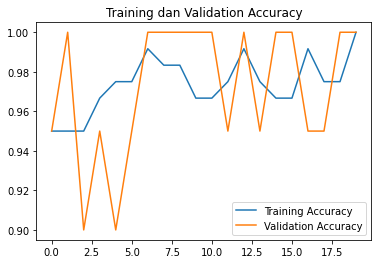

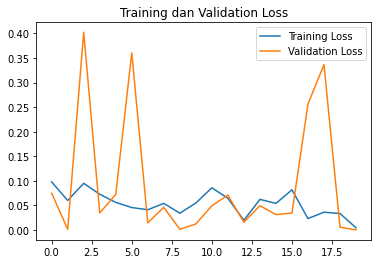

In [ ]:
# plot accuracy dan loss model
# matikan callbacks pada model fit history
# setelah history dijalankan, data dari accuracy, val_accuracy, 
# loss, val_loss dikumpulkan dan dibuat menjadi plot

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

x = range(20)                                           # axis-x berdasarkan epoch

plt.plot(x, accuracy, label='Training Accuracy')        # Plot untuk Akurasi latihan
plt.plot(x, val_accuracy, label='Validation Accuracy')  # Plot untuk Akurasi validasi
plt.legend(loc='lower right')                           # Membuat legenda pada bawah kanan
plt.title('Training dan Validation Accuracy')           # Nama plot
plt.show()

plt.plot(x, loss, label='Training Loss')                # Plot untuk Error latihan
plt.plot(x, val_loss, label='Validation Loss')          # Plot untuk Error validasi
plt.legend(loc='upper right')                           # Membuat legenda pada bawah atas
plt.title('Training dan Validation Loss')               # Nama plot
plt.show()

Saving 069467800_1483447177-topic_article_telapak_tangan_keringat.jpg to 069467800_1483447177-topic_article_telapak_tangan_keringat.jpg
069467800_1483447177-topic_article_telapak_tangan_keringat.jpg
paper


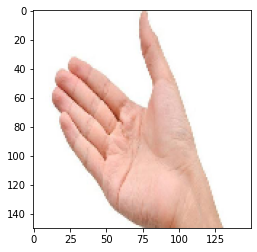

In [ ]:
uploaded = files. upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')